In [ ]:
#Import Library
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [ ]:
print(tf.__version__)

2.5.0


In [ ]:
#Import data From Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Unzip dataset
!apt install unzip

!unzip -q drive/Shareddrives/Dataset/dataset.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [ ]:
# Preprocessing
# Image Data Augmentation : memperluas dataset training untuk meningkatkan kinerja 
# dan kemampuan model untuk menggeneralisasi.
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        '/content/dataset2/dataset/train',  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/dataset2/dataset/validation', # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

Found 560 images belonging to 2 classes.
Found 288 images belonging to 2 classes.


In [ ]:
# Arsitektur 
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
import time
# Starting Time
start = time.time()

# Training model
history = model.fit(
            train_generator,
            steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
            epochs=20,
            validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
            validation_steps=5,  # erapa batch yang akan dieksekusi pada setiap epoch
            verbose=2)

#Calculate training time

end = time.time()
dur = end-start

if dur>60 and dur<3600:
    dur=dur/60
    print("\nExecution Time: %.4f" % dur," minutes")
else:
    dur=dur/(60*60)
    print("Execution Time: %.4f" % dur,"hours")

Epoch 1/20
25/25 - 11s - loss: 0.6932 - accuracy: 0.6400 - val_loss: 0.7632 - val_accuracy: 0.3000
Epoch 2/20
25/25 - 11s - loss: 0.6641 - accuracy: 0.5600 - val_loss: 0.5678 - val_accuracy: 0.7000
Epoch 3/20
25/25 - 10s - loss: 0.4106 - accuracy: 0.8400 - val_loss: 0.3195 - val_accuracy: 0.9000
Epoch 4/20
25/25 - 10s - loss: 0.2831 - accuracy: 0.9100 - val_loss: 0.1449 - val_accuracy: 0.9500
Epoch 5/20
25/25 - 11s - loss: 0.1728 - accuracy: 0.9300 - val_loss: 0.4593 - val_accuracy: 0.7500
Epoch 6/20
25/25 - 11s - loss: 0.0431 - accuracy: 1.0000 - val_loss: 0.0769 - val_accuracy: 0.9500
Epoch 7/20
25/25 - 11s - loss: 0.2355 - accuracy: 0.9300 - val_loss: 0.1709 - val_accuracy: 0.9500
Epoch 8/20
25/25 - 10s - loss: 0.2763 - accuracy: 0.8900 - val_loss: 0.1432 - val_accuracy: 1.0000
Epoch 9/20
25/25 - 11s - loss: 0.1589 - accuracy: 0.9400 - val_loss: 0.0535 - val_accuracy: 1.0000
Epoch 10/20
25/25 - 11s - loss: 0.2166 - accuracy: 0.9200 - val_loss: 0.0434 - val_accuracy: 1.0000
Epoch 11/

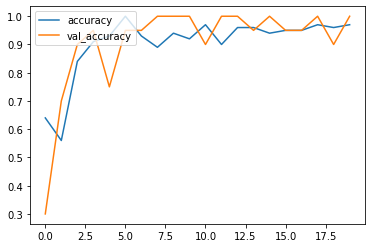

In [ ]:
# Visualization of accuracy model

from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend(loc="upper left")
plt.show()

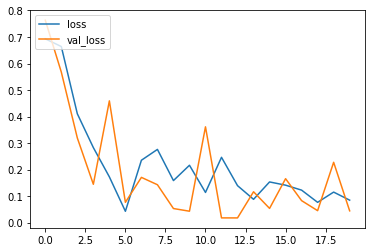

In [ ]:
# Visualization of loss model

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc="upper left")
plt.show()

In [ ]:
# Import library

from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline


In [ ]:
# Predict function
def predict(file):
  path = file
  img = image.load_img(path, target_size=(150,150))
  # imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  result = ''
  print(path)
  # print(classes)
  if classes==0:
    result = 'covid'
  elif classes==1:
    result = 'normal'
  else :
    result = 'bukan keduanya!'
  
  return result

In [ ]:
# Testing model untuk folder yang berisi data covid
urutan = 0
jumlah_covid = 0
jumlah_normal = 0
jumlah_bukan_keduanya = 0
# predicting images
# print(train_generator.class_indices)
for _i in range(40):
  path = '/content/dataset2/dataset/test/covid/'+str(urutan)+'.jpg'
  hasil = predict(path)
  print(hasil)
  if hasil == 'covid' :
    jumlah_covid += 1
  elif hasil == 'normal' :
    jumlah_normal += 1
  else :
    jumlah_bukan_keduanya += 1
  urutan += 1

print('Jumlah Hasil Prediksi Covid : ', jumlah_covid)
print('Jumlah Hasil Prediksi Normal : ', jumlah_normal)
print('Jumlah Hasil Prediksi Bukan Keduanya : ', jumlah_bukan_keduanya)

/content/dataset2/dataset/test/covid/0.jpg
covid
/content/dataset2/dataset/test/covid/1.jpg
covid
/content/dataset2/dataset/test/covid/2.jpg
covid
/content/dataset2/dataset/test/covid/3.jpg
covid
/content/dataset2/dataset/test/covid/4.jpg
covid
/content/dataset2/dataset/test/covid/5.jpg
covid
/content/dataset2/dataset/test/covid/6.jpg
covid
/content/dataset2/dataset/test/covid/7.jpg
covid
/content/dataset2/dataset/test/covid/8.jpg
covid
/content/dataset2/dataset/test/covid/9.jpg
covid
/content/dataset2/dataset/test/covid/10.jpg
covid
/content/dataset2/dataset/test/covid/11.jpg
covid
/content/dataset2/dataset/test/covid/12.jpg
covid
/content/dataset2/dataset/test/covid/13.jpg
covid
/content/dataset2/dataset/test/covid/14.jpg
covid
/content/dataset2/dataset/test/covid/15.jpg
covid
/content/dataset2/dataset/test/covid/16.jpg
covid
/content/dataset2/dataset/test/covid/17.jpg
covid
/content/dataset2/dataset/test/covid/18.jpg
covid
/content/dataset2/dataset/test/covid/19.jpg
covid
/content/d

In [ ]:
# Testing model untuk folder yang berisi data X-ray Normal
urutan = 0
jumlah_covid = 0
jumlah_normal = 0
jumlah_bukan_keduanya = 0
# predicting images
# print(train_generator.class_indices)
for _i in range(40):
  path = '/content/dataset2/dataset/test/normal/'+str(urutan)+'.jpg'
  hasil = predict(path)
  print(hasil)
  if hasil == 'covid' :
    jumlah_covid += 1
  elif hasil == 'normal' :
    jumlah_normal += 1
  else :
    jumlah_bukan_keduanya += 1
  urutan += 1

print('Jumlah Hasil Prediksi Covid : ', jumlah_covid)
print('Jumlah Hasil Prediksi Normal : ', jumlah_normal)
print('Jumlah Hasil Prediksi Bukan Keduanya : ', jumlah_bukan_keduanya)

/content/dataset2/dataset/test/normal/0.jpg
normal
/content/dataset2/dataset/test/normal/1.jpg
normal
/content/dataset2/dataset/test/normal/2.jpg
normal
/content/dataset2/dataset/test/normal/3.jpg
normal
/content/dataset2/dataset/test/normal/4.jpg
normal
/content/dataset2/dataset/test/normal/5.jpg
normal
/content/dataset2/dataset/test/normal/6.jpg
normal
/content/dataset2/dataset/test/normal/7.jpg
normal
/content/dataset2/dataset/test/normal/8.jpg
normal
/content/dataset2/dataset/test/normal/9.jpg
normal
/content/dataset2/dataset/test/normal/10.jpg
normal
/content/dataset2/dataset/test/normal/11.jpg
normal
/content/dataset2/dataset/test/normal/12.jpg
normal
/content/dataset2/dataset/test/normal/13.jpg
normal
/content/dataset2/dataset/test/normal/14.jpg
normal
/content/dataset2/dataset/test/normal/15.jpg
covid
/content/dataset2/dataset/test/normal/16.jpg
normal
/content/dataset2/dataset/test/normal/17.jpg
normal
/content/dataset2/dataset/test/normal/18.jpg
normal
/content/dataset2/datas

In [ ]:
# Saving model
import os, sys

target_dir = '/content/drive/Shareddrives/Dataset/output/Lana1/model'
if not os.path.exists(target_dir):
  os.mkdir(target_dir)
model.save('/content/drive/Shareddrives/Dataset/output/Lana1/model/model.h5')
model.save_weights('/content/drive/Shareddrives/Dataset/output/Lana1/model/weights.h5')